In [1]:
# Imports
import pandas as pd

In [ ]:
'''
Imagine that you are in the role of Data Analyst, Insights at Suited. We have a client that
provided us with hiring data on recent applicants and asks "is the algorithm working?" and
“what is a good score?”

For the sake of this analysis, we will try to answer that questions by comparing their hiring
decisions (e.g. Rejected after 1st Round) with Suited’s Behavioral Score and Cognitive Skills
(attention to detail, critical reasoning, and logical reasoning, scored as a percentile).
'''

In [ ]:
'''
1. First, you will need to merge the data provided by the client (tab “Applicants”) with the
predictions generated by Suited (tab “Suited Export”).
a. Candidates applied to the firm directly and often used different email addresses
in their application to the firm. Find the mismatches to merge as much data as
possible.
'''

In [365]:
# Reading in data
suited = pd.read_excel('/Users/naveenmsu/Desktop/Suited/Work Sample - Dataset.xlsx', sheet_name='Suited Export')
applicants = pd.read_excel('/Users/naveenmsu/Desktop/Suited/Work Sample - Dataset.xlsx', sheet_name='Applicants')

In [366]:
suited.head()

,Unnamed: 0,Behavioral Score,Critical Reasoning,Logical Reasoning,Attention to Detail,First Name,Last Name,Suited Email,School,Degree,GPA
0,NaN,0.404597,57.156531,75.782095,59.002629,Alice,Adams,aliceadams@smu.edu,Southern Methodist University,Bachelors,4.0
1,NaN,0.321920,33.693535,55.866533,62.830515,Amy,Adams,amyadams@gmail.com,Columbia University,Bachelors,3.8
2,NaN,0.505603,26.722004,55.866533,47.150371,Amy,Adams,amyadams@michigan.edu,University of Michigan - Ann Arbor,Bachelors,3.8
3,NaN,0.000522,11.076972,29.388550,10.288117,Angela,Adams,angelaadams@unc.edu,University of North Carolina at Chapel Hill,Bachelors,3.0
4,NaN,0.010605,49.200570,86.716800,43.205836,Betty,Adams,bettyadams@oxford.edu,University of Oxford,Bachelors,3.7


In [367]:
applicants.head()

,Unnamed: 0,First Name,Last Name,School,Applicant Email,Status
0,NaN,Alice,Adams,Southern Methodist University,aliceadams@smu.edu,Received Job Offer
1,NaN,Amy,Adams,Columbia University,amyadams@columbia.edu,Rejected after 1st Round
2,NaN,Betty,Adams,University of Oxford,bettyadams@oxford.edu,Rejected after 1st Round
3,NaN,Richard,Adams,"City University of New York, Bernard M. Baruch...",richardadams@baruch.edu,Rejected after 1st Round
4,NaN,Sandra,Adams,"City University of New York, Bernard M. Baruch...",sandraadams@baruch.edu,Rejected after 2nd Round


In [368]:
# Dropping 1st column in suited as it has no values
suited = suited.drop(suited.columns[0], axis=1)

In [369]:
# Dropping 1st column in applicants as it has no values
applicants = applicants.drop(applicants.columns[0], axis=1)

In [370]:
# Finding shape
suited.shape, applicants.shape

((1134, 10), (148, 5))

In [371]:
# Instead of merging immediately by email, there might be some candidates that are the same but have different emails. So using left join now.
same_email = pd.merge(applicants, suited, left_on='Applicant Email', right_on='Suited Email', how='left')

In [372]:
same_email.columns

Index(['First Name_x', 'Last Name_x', 'School_x', 'Applicant Email', 'Status',
       'Behavioral Score', 'Critical Reasoning', 'Logical Reasoning',
       'Attention to Detail', 'First Name_y', 'Last Name_y', 'Suited Email',
       'School_y', 'Degree', 'GPA'],
      dtype='object')

In [373]:
# Dropping unnecessary columns
same_email.drop(['First Name_y', 'Last Name_y', 'School_y'], inplace=True, axis=1)

In [374]:
same_email.columns

Index(['First Name_x', 'Last Name_x', 'School_x', 'Applicant Email', 'Status',
       'Behavioral Score', 'Critical Reasoning', 'Logical Reasoning',
       'Attention to Detail', 'Suited Email', 'Degree', 'GPA'],
      dtype='object')

In [375]:
# Renaming columns
same_email.columns = ['First Name', 'Last Name', 'School', 'Applicant Email', 'Status',
       'Behavioral Score', 'Critical Reasoning', 'Logical Reasoning',
       'Attention to Detail', 'Suited Email', 'Degree', 'GPA']

In [376]:
suited.columns

Index(['Behavioral Score', 'Critical Reasoning', 'Logical Reasoning',
       'Attention to Detail', 'First Name', 'Last Name', 'Suited Email',
       'School', 'Degree', 'GPA'],
      dtype='object')

In [377]:
# Finding all unmatched emails
unmatched_same_email = same_email[same_email['Suited Email'].isna()]
unmatched_same_email.reset_index(drop=True, inplace=True)

In [455]:
unmatched_same_email.head()

,First Name,Last Name,School,Applicant Email,Status,Behavioral Score,Critical Reasoning,Logical Reasoning,Attention to Detail,Suited Email,Degree,GPA
0,Amy,Adams,Columbia University,amyadams@columbia.edu,Rejected after 1st Round,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carol,Anderson,University of Notre Dame,carolanderson@und.edu,Received Job Offer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rebecca,Brown,London Business School,rebeccabrown@londonbusiness.edu,Rejected after 1st Round,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ruth,Campbell,University of Southern California,ruthcampbell@usc.edu,Rejected after 1st Round,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Virginia,Collins,Indiana University at Bloomington,virginiacollins@indiana.edu,Rejected after 1st Round,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
unmatched_same_email.columns

Index(['First Name', 'Last Name', 'School', 'Applicant Email', 'Status',
       'Behavioral Score', 'Critical Reasoning', 'Logical Reasoning',
       'Attention to Detail', 'Suited Email', 'Degree', 'GPA'],
      dtype='object')

In [380]:
cols = ['Behavioral Score', 'Critical Reasoning', 'Logical Reasoning',
       'Attention to Detail', 'Suited Email', 'Degree', 'GPA']

In [394]:
# Checking each unmatched email if they have data in suited export based on their name and school. Updating their corresponding Suited email if initially unmatched
for p, x, y, z in zip(unmatched_same_email.loc[:,'Applicant Email'].values, 
                      unmatched_same_email.loc[:,'First Name'].values, 
                      unmatched_same_email.loc[:,'Last Name'].values, 
                      unmatched_same_email.loc[:,'School'].values):
    same_email.loc[same_email['Applicant Email'] == p, cols] = suited.loc[(suited['First Name'] == x) & 
                                                                          (suited['Last Name'] == y) & 
                                                                          (suited['School'] == z), cols].values
    # print(same_email.loc[same_email['Applicant Email'] == p, 'Suited Email']

1    amyadams@gmail.com
Name: Suited Email, dtype: object
6    canderson@gmail.com
Name: Suited Email, dtype: object
19    rebeccabrown@gmail.com
Name: Suited Email, dtype: object
21    ruthcampbell@gmail.com
Name: Suited Email, dtype: object
27    vcollins@gmail.com
Name: Suited Email, dtype: object
30    daviddavis@gmail.com
Name: Suited Email, dtype: object
31    edavis@gmail.com
Name: Suited Email, dtype: object
33    sedwards@gmail.com
Name: Suited Email, dtype: object
40    dorisgonzalez@gmail.com
Name: Suited Email, dtype: object
45    ehall@gmail.com
Name: Suited Email, dtype: object
53    djohnson@gmail.com
Name: Suited Email, dtype: object
55    dking@gmail.com
Name: Suited Email, dtype: object
58    vking@gmail.com
Name: Suited Email, dtype: object
60    slee@gmail.com
Name: Suited Email, dtype: object
70    rmartin@gmail.com
Name: Suited Email, dtype: object
72    dmiller@gmail.com
Name: Suited Email, dtype: object
77    amorgan@gmail.com
Name: Suited Email, dtype: object
8

In [388]:
# Dropping unmatched records
final = same_email.loc[~same_email['Suited Email'].isna()]

In [428]:
'''
2. Next, you should use the merged data to run some analyses to decide what we can
determine about candidates that made it to each stage of the client’s hiring process.
a. Be careful - some candidates didn’t complete the ECA (indicated by a 0 score)
and their ECA scores will need to be excluded from the analyses.
'''

# Dropping records where Critical Reasoning, Attention to detail and Logical Reasoning are 0
final = final.loc[(final['Critical Reasoning'] != 0) | (final['Attention to Detail'] != 0) | (final['Logical Reasoning'] != 0) | (final['Behavioral Score'] != 0)].reset_index(drop=True)


In [606]:
'''b. What are the average Critical Reasoning, Attention to detail and Logical Reasoning scores for candidates that made it to
each stage - is there a trend? Does mean or median tell a better story? What about ranges?'''

final.groupby(['Status']).agg({'Critical Reasoning':  ['mean', 'median', 'max', 'min', 'count'], 
                               'Attention to Detail': ['mean', 'median', 'max', 'min', 'count'], 
                               'Logical Reasoning':   ['mean', 'median', 'max', 'min', 'count'],
                               'Behavioral Score':    ['mean', 'median', 'max', 'min', 'count']}).round(2)



Critical Reasoning                             \
                                       mean median    max    min count   
Status                                                                   
Received Job Offer                    71.80  71.94  99.93  15.34    28   
Rejected after 1st Round              36.19  33.69  94.33   2.15    84   
Rejected after 2nd Round              61.28  60.99  97.64  26.72    20   

                         Attention to Detail                             \
                                        mean median    max    min count   
Status                                                                    
Received Job Offer                     82.03  84.76  99.77  55.09    28   
Rejected after 1st Round               54.75  59.00  99.83   0.01    84   
Rejected after 2nd Round               78.96  82.29  96.61  51.12    20   

                         Logical Reasoning                             \
                                      mean median    max    min count   
Status                                                                  
Received Job Offer                   73.32  75.78  99.37  34.31    28   
Rejected after 1st Round             39.86  39.50  93.66   0.98    84   
Rejected after 2nd Round             59.46  66.40  93.66  10.90    20   

                         Behavioral Score                          
                                     mean median   max  min count  
Status                                                             
Received Job Offer                   0.34   0.19  1.00  0.0    28  
Rejected after 1st Round             0.15   0.04  0.98  0.0    84  
Rejected after 2nd Round             0.23   0.14  1.00  0.0    20

In [ ]:
critical_std = final.groupby(['Status'])['Critical Reasoning'].std().round(2)
attention_std = final.groupby(['Status'])['Attention to Detail'].std().round(2)
logical_std = final.groupby(['Status'])['Logical Reasoning'].std().round(2)
behavioral_std = final.groupby(['Status'])['Behavioral Score'].std().round(2)

In [495]:
critical_std.mean()

21.683333333333337

In [431]:
'''
Proportion of Candidates that reached each Status
'''
final.groupby(['Status']).size().div(final.shape[0]).round(2)

Status
Received Job Offer          0.21
Rejected after 1st Round    0.64
Rejected after 2nd Round    0.15
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb762c91b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb762ca0100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb762c91850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb762ca06a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb762ca0970>],
 'means': []}

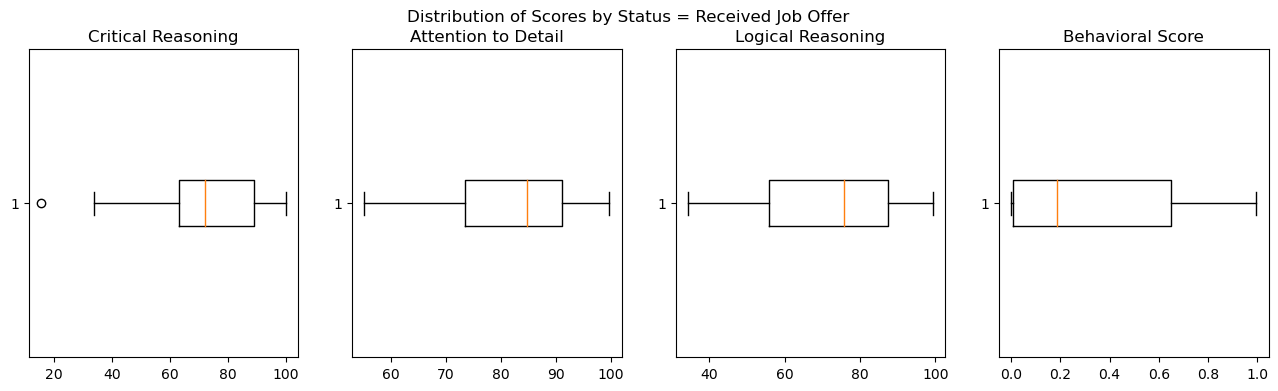

In [437]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Distribution of Scores by Status = Received Job Offer')

ax[0].set_title('Critical Reasoning')
ax[0].boxplot(final.loc[final['Status'] == 'Received Job Offer', 'Critical Reasoning'], vert=False)

ax[1].set_title('Attention to Detail')
ax[1].boxplot(final.loc[final['Status'] == 'Received Job Offer', 'Attention to Detail'], vert=False)

ax[2].set_title('Logical Reasoning')
ax[2].boxplot(final.loc[final['Status'] == 'Received Job Offer', 'Logical Reasoning'], vert=False)

ax[3].set_title('Behavioral Score')
ax[3].boxplot(final.loc[final['Status'] == 'Received Job Offer', 'Behavioral Score'], vert=False)


(array([13.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  3.,  2.]),
 array([2.01643437e-05, 9.97496489e-02, 1.99479133e-01, 2.99208618e-01,
        3.98938102e-01, 4.98667587e-01, 5.98397072e-01, 6.98126556e-01,
        7.97856041e-01, 8.97585525e-01, 9.97315010e-01]),
 <BarContainer object of 10 artists>)

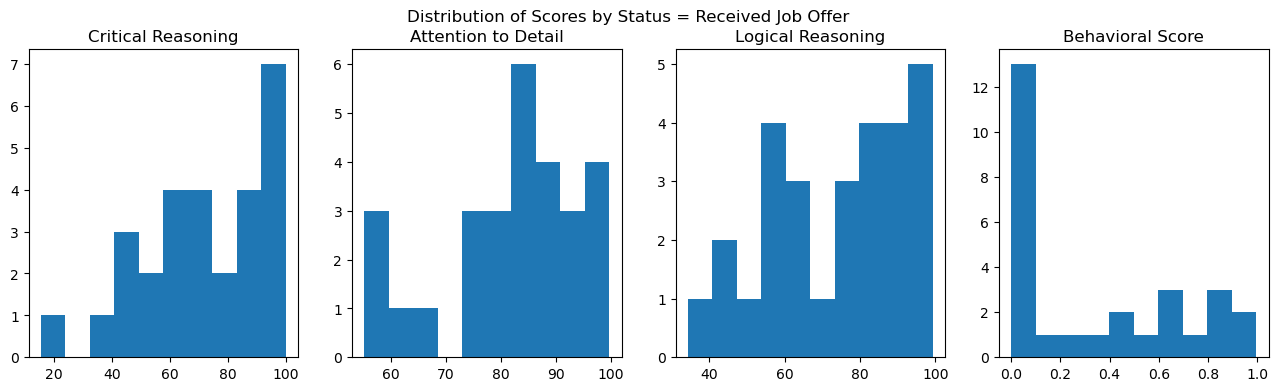

In [439]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Distribution of Scores by Status = Received Job Offer')

ax[0].set_title('Critical Reasoning')
ax[0].hist(final.loc[final['Status'] == 'Received Job Offer', 'Critical Reasoning'])

ax[1].set_title('Attention to Detail')
ax[1].hist(final.loc[final['Status'] == 'Received Job Offer', 'Attention to Detail'])

ax[2].set_title('Logical Reasoning')
ax[2].hist(final.loc[final['Status'] == 'Received Job Offer', 'Logical Reasoning'])

ax[3].set_title('Behavioral Score')
ax[3].hist(final.loc[final['Status'] == 'Received Job Offer', 'Behavioral Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb71166eee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb71167a4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb71166ec10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb71167aa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb71167ad30>],
 'means': []}

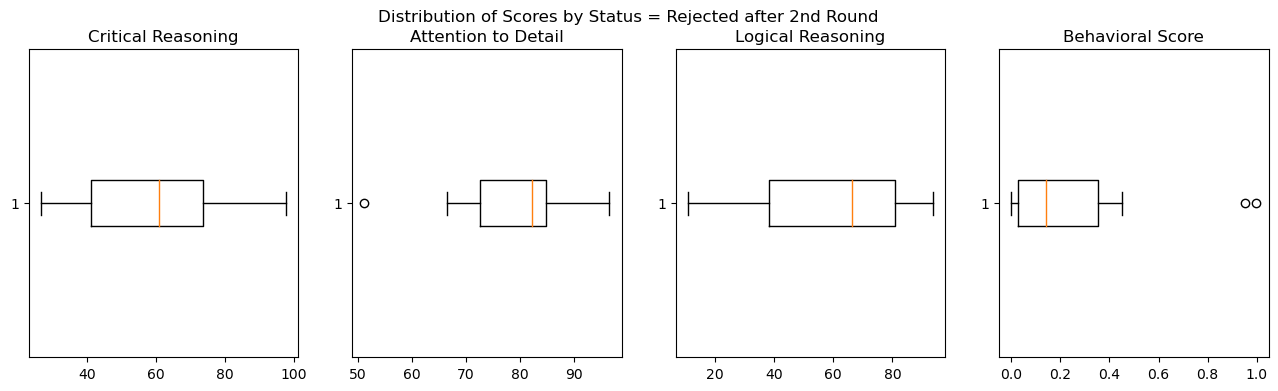

In [445]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Distribution of Scores by Status = Rejected after 2nd Round')
ax[0].set_title('Critical Reasoning')
ax[0].boxplot(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Critical Reasoning'], vert=False)

ax[1].set_title('Attention to Detail')
ax[1].boxplot(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Attention to Detail'], vert=False)

ax[2].set_title('Logical Reasoning')
ax[2].boxplot(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Logical Reasoning'], vert=False)

ax[3].set_title('Behavioral Score')
ax[3].boxplot(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Behavioral Score'], vert=False)

(array([9., 4., 1., 2., 2., 0., 0., 0., 0., 2.]),
 array([3.08863218e-04, 1.00117055e-01, 1.99925247e-01, 2.99733440e-01,
        3.99541632e-01, 4.99349824e-01, 5.99158016e-01, 6.98966208e-01,
        7.98774400e-01, 8.98582592e-01, 9.98390785e-01]),
 <BarContainer object of 10 artists>)

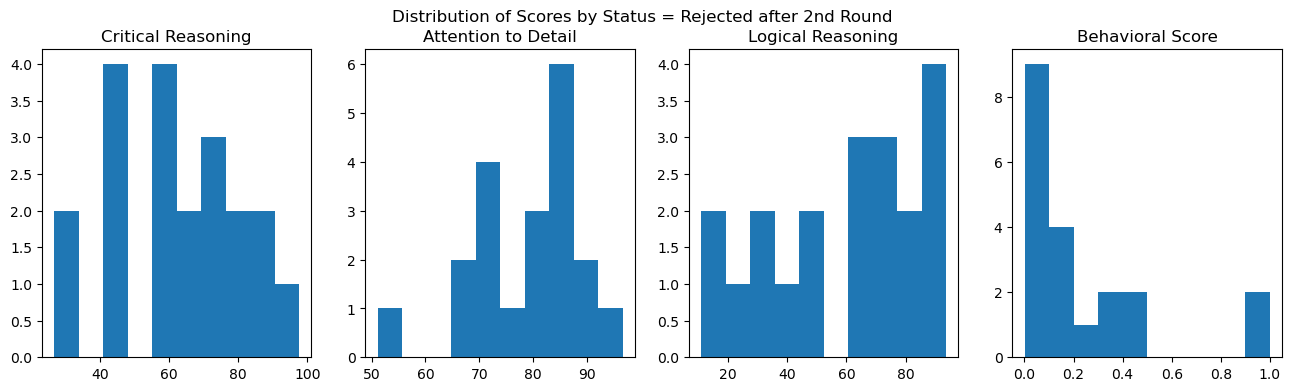

In [446]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Distribution of Scores by Status = Rejected after 2nd Round')
ax[0].set_title('Critical Reasoning')
ax[0].hist(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Critical Reasoning'])

ax[1].set_title('Attention to Detail')
ax[1].hist(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Attention to Detail'])

ax[2].set_title('Logical Reasoning')
ax[2].hist(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Logical Reasoning'])

ax[3].set_title('Behavioral Score')
ax[3].hist(final.loc[final['Status'] == 'Rejected after 2nd Round', 'Behavioral Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb711607e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb711615400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb711607b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb7116159a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb711615c70>],
 'means': []}

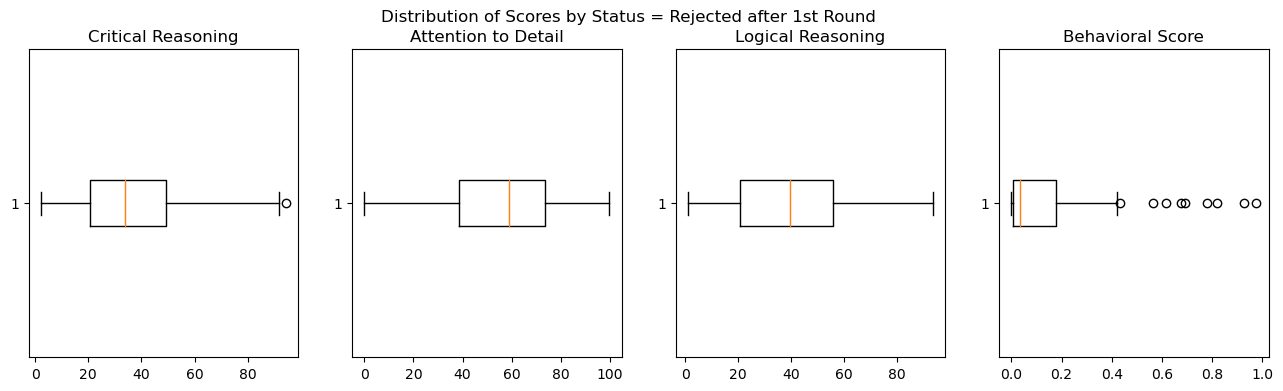

In [442]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Distribution of Scores by Status = Rejected after 1st Round')
ax[0].set_title('Critical Reasoning')
ax[0].boxplot(final.loc[final['Status'] == 'Rejected after 1st Round', 'Critical Reasoning'], vert=False)

ax[1].set_title('Attention to Detail')
ax[1].boxplot(final.loc[final['Status'] == 'Rejected after 1st Round', 'Attention to Detail'], vert=False)

ax[2].set_title('Logical Reasoning')
ax[2].boxplot(final.loc[final['Status'] == 'Rejected after 1st Round', 'Logical Reasoning'], vert=False)

ax[3].set_title('Behavioral Score')
ax[3].boxplot(final.loc[final['Status'] == 'Rejected after 1st Round', 'Behavioral Score'], vert=False)

(array([57.,  6.,  6.,  3.,  4.,  1.,  2.,  2.,  1.,  2.]),
 array([1.96071672e-05, 9.75868658e-02, 1.95154124e-01, 2.92721383e-01,
        3.90288642e-01, 4.87855900e-01, 5.85423159e-01, 6.82990418e-01,
        7.80557676e-01, 8.78124935e-01, 9.75692194e-01]),
 <BarContainer object of 10 artists>)

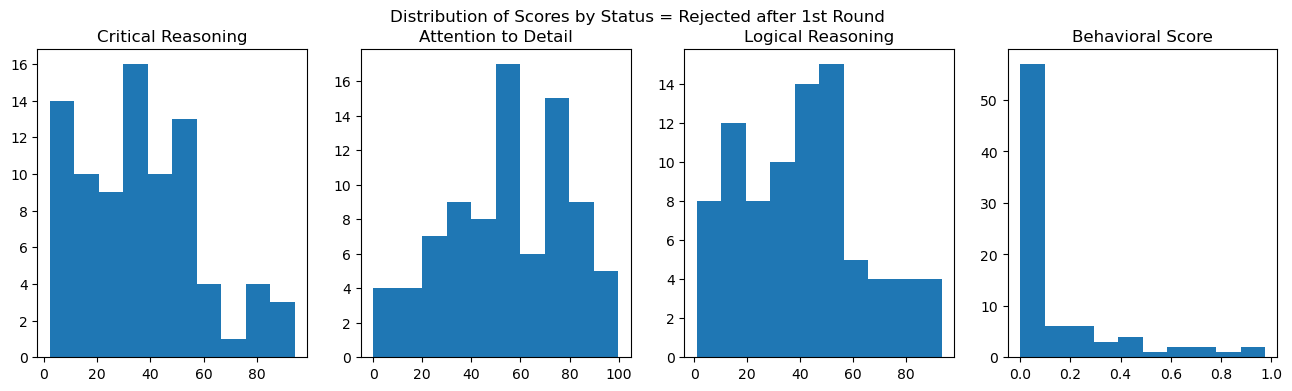

In [443]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Distribution of Scores by Status = Rejected after 1st Round')
ax[0].set_title('Critical Reasoning')
ax[0].hist(final.loc[final['Status'] == 'Rejected after 1st Round', 'Critical Reasoning'])

ax[1].set_title('Attention to Detail')
ax[1].hist(final.loc[final['Status'] == 'Rejected after 1st Round', 'Attention to Detail'])

ax[2].set_title('Logical Reasoning')
ax[2].hist(final.loc[final['Status'] == 'Rejected after 1st Round', 'Logical Reasoning'])

ax[3].set_title('Behavioral Score')
ax[3].hist(final.loc[final['Status'] == 'Rejected after 1st Round', 'Behavioral Score'])

In [447]:
'''
c. How does Suited compare to GPA as a predictor of getting a job?
'''
final['GPA'] = pd.to_numeric(final['GPA'], errors='coerce')


final['GPA_binned'] = ['Low' if x < 3.0 else 'Med' if x >=3.0 and x < 3.5 else 'High' for x in final['GPA']]

In [522]:
pd.crosstab(final['Status'], final['GPA_binned'])

GPA_binned,High,Low,Med
Status,,,
Received Job Offer,25,0,3
Rejected after 1st Round,63,3,18
Rejected after 2nd Round,17,0,3


<AxesSubplot:ylabel='GPA_binned'>

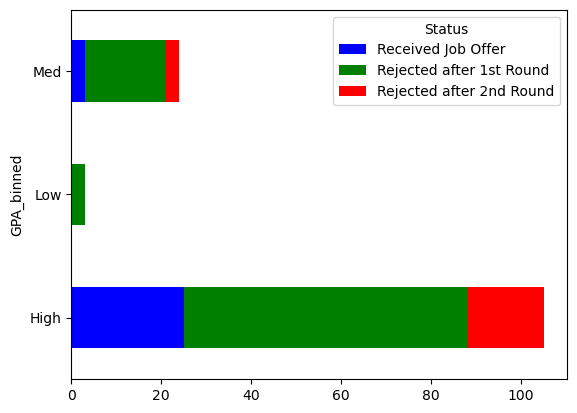

In [448]:
pd.crosstab(final['GPA_binned'], final['Status']).plot(kind='barh', stacked=True, color=['blue', 'green', 'red'])

<AxesSubplot:ylabel='Status'>

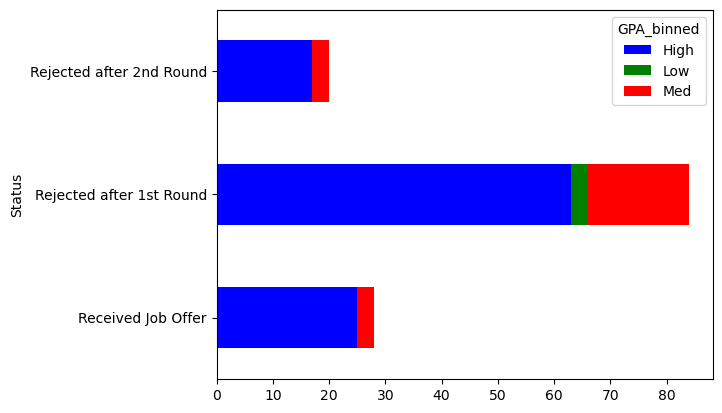

In [449]:
pd.crosstab(final['Status'], final['GPA_binned']).plot(kind='barh', stacked=True, color=['blue', 'green', 'red'])

In [451]:
# Generating correlation matrix between ECAs and GPA for those offered the job, those that were rejected at R1 and those that were rejected at R2
rjo_corr = final.loc[final['Status'] == 'Received Job Offer', ['Critical Reasoning', 'Attention to Detail', 'Logical Reasoning', 'Behavioral Score', 'GPA']].corr()
rfr_corr = final.loc[final['Status'] == 'Rejected after 1st Round', ['Critical Reasoning', 'Attention to Detail', 'Logical Reasoning', 'Behavioral Score', 'GPA']].corr()
rsr_corr = final.loc[final['Status'] == 'Rejected after 2nd Round', ['Critical Reasoning', 'Attention to Detail', 'Logical Reasoning', 'Behavioral Score', 'GPA']].corr()

<AxesSubplot:>

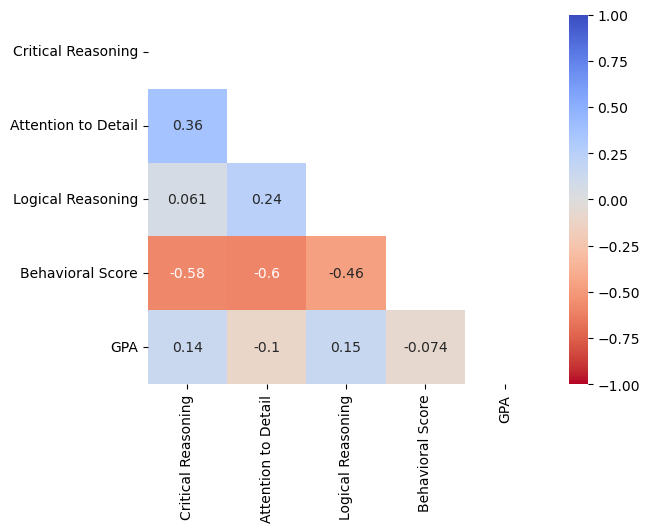

In [452]:
# Those offered the job interestingly had higher negative correlations with the other ECAs, 
# meaning that these candidates either scored really well in behavioral or the other ECAs
import seaborn as sns
import numpy as np
mask = np.triu(np.ones_like(rjo_corr, dtype=bool))
sns.heatmap(rjo_corr, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1, mask=mask)

<AxesSubplot:>

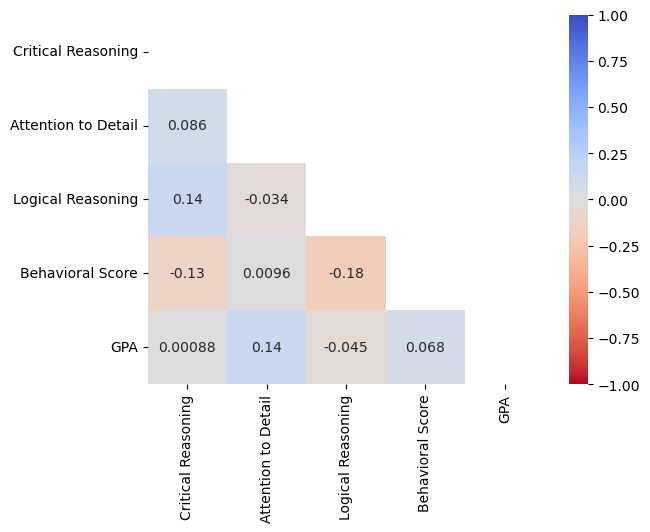

In [453]:
mask = np.triu(np.ones_like(rfr_corr, dtype=bool))
sns.heatmap(rfr_corr, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1, mask=mask)

<AxesSubplot:>

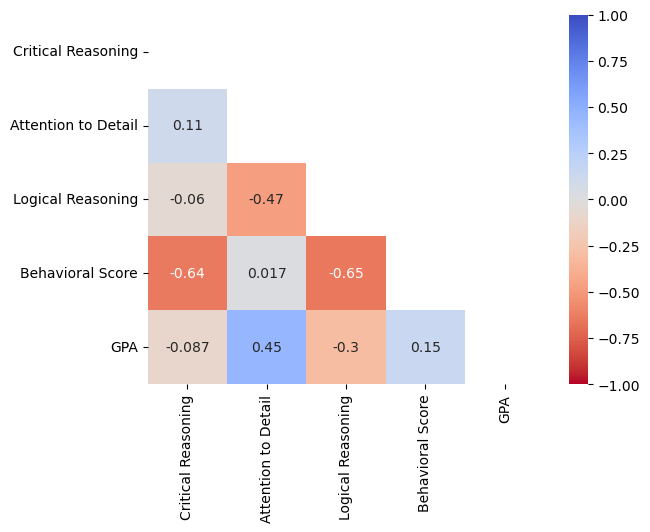

In [454]:
mask = np.triu(np.ones_like(rsr_corr, dtype=bool))
sns.heatmap(rsr_corr, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1, mask=mask)

In [ ]:
# Correlation matrix for R2 rejects did not provide any meaningful info
# For R1 rejects, candidates typically had a GPA somewhat correlated to their Attention to Detail, but these also arent very meaningful

In [506]:
# Binning scores based on mean and standard deviation
final['Logical Reasoning_binned'] = [0 if x < 70 else 1 if x >= 70 and x < x+logical_std.mean() else 2 for x in final['Logical Reasoning']]
final['Critical Reasoning_binned'] = [0 if x < 70 else 1 if x >= 70 and x < x+critical_std.mean() else 2 for x in final['Critical Reasoning']]
final['Attention to Detail_binned'] = [0 if x < 80 else 1 if x >= 80 and x < x+attention_std.mean() else 2 for x in final['Attention to Detail']]
final['Behavioral_binned'] = [0 if x < 0.30 else 1 if x >= 0.30 and x < x+behavioral_std.mean() else 2 for x in final['Behavioral Score']]

In [507]:
# Creating simple score function
final['Score'] = final['Logical Reasoning_binned'] + final['Critical Reasoning_binned']+ final['Attention to Detail_binned']+ final['Behavioral_binned']

In [582]:
'''
d. How does Suited compare to school as a predictor of getting a job?
'''
# The distributions below are simliar in nature but are off in values by a single record. 
# Nevertheless, suited works well to predict which schools high performing candidates are from

'\nd. How does Suited compare to school as a predictor of getting a job?\n'

(0.0, 6.0)

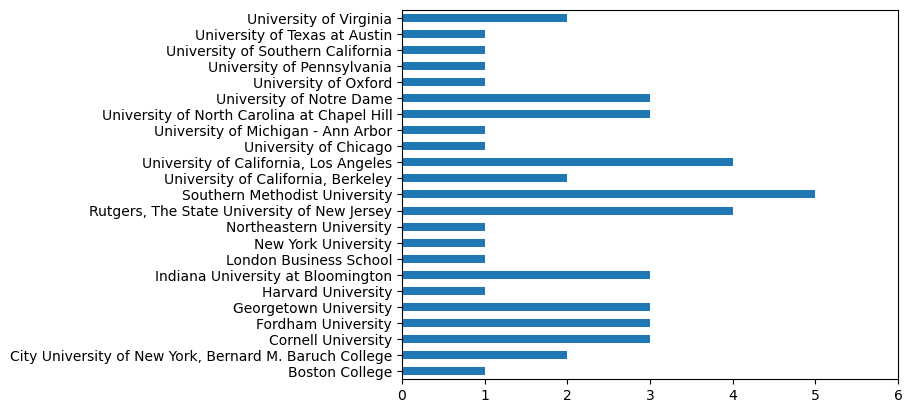

In [602]:
# Candidates' schools from their application
x = final.loc[(final['Status'] == 'Received Job Offer') | (final['Status'] == 'Rejected after 2nd Round'),'School'].value_counts().sort_index().plot(kind='barh')
plt.xlim([0, 6])

(0.0, 6.0)

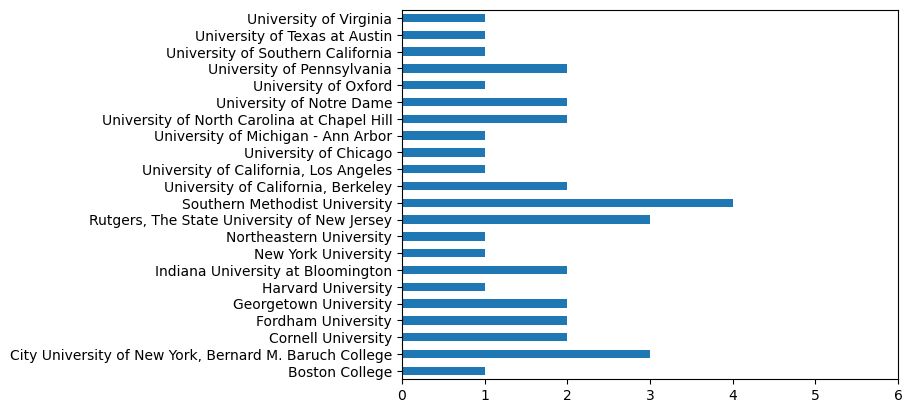

In [604]:
# Distribution of schools where the candidate scored atleast 2 in the ECA and had a GPA > 3
final.loc[(final['Score'] >= 2) & (final['GPA'] >= 3),'School'].value_counts().sort_index().plot(kind='barh')
plt.xlim([0, 6])

In [ ]:
'''
3. Finally, please produce up to 3 graphs / charts that you think best represent your findings
that answer the question “is the algorithm working” and “what is a good score”. Please
select graphs / charts that you feel will convey your findings to someone with limited
statistical knowledge.
'''

# The below 3 charts (+ 1 bonus chart thats been commented out) help in explaining the findings of this analysis

<AxesSubplot:title={'center':'Distribution of candidate scores that have received the job'}, ylabel='Status'>

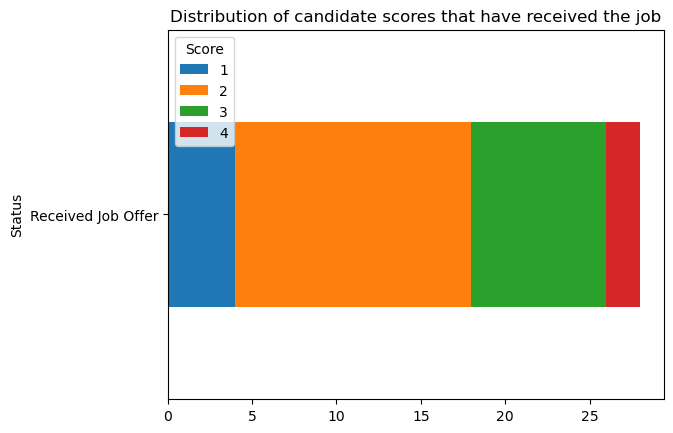

In [540]:
# How much did people who received an offer score?
pd.crosstab(final.loc[final['Status']=='Received Job Offer', 'Status'], final.loc[final['Status']=='Received Job Offer', 'Score']).plot(kind='barh', stacked=True, title="Distribution of candidate scores that have received the job")

<AxesSubplot:title={'center':'GPA of candidates that were offered the job'}>

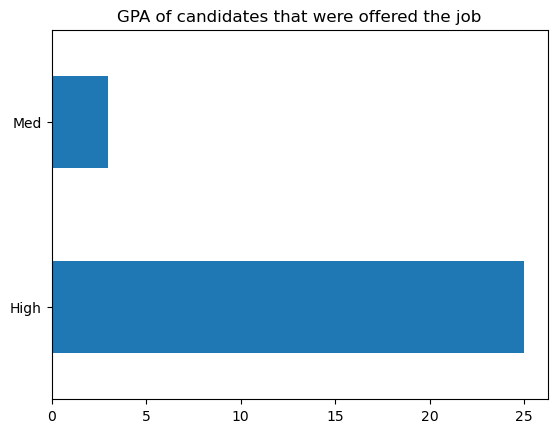

In [562]:
# What was the GPA of candidates that were offered the job?
final.loc[(final['Status'] == 'Received Job Offer') ,'GPA_binned'].value_counts().plot(kind='barh', title='GPA of candidates that were offered the job')

<AxesSubplot:title={'center':'Distribution of candidate scores that were rejected at R2'}, ylabel='Status'>

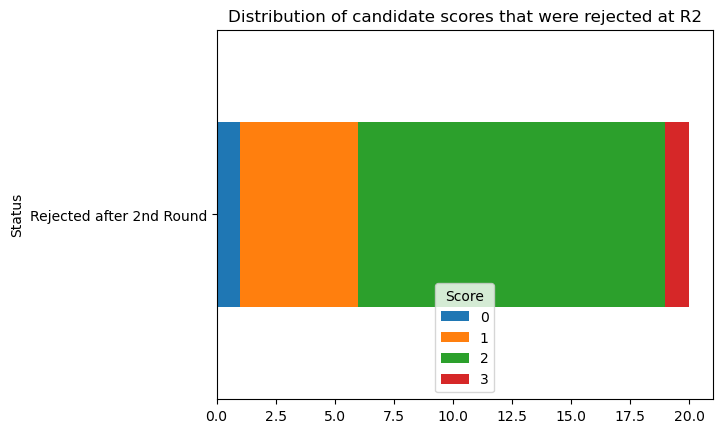

In [578]:
# How much did people who were rejected in the 2nd round score?
pd.crosstab(final.loc[final['Status']=='Rejected after 2nd Round', 'Status'], final.loc[final['Status']=='Rejected after 2nd Round', 'Score']).plot(kind='barh', stacked=True, title="Distribution of candidate scores that were rejected at R2")

In [607]:
#final.loc[(final['Status'] == 'Rejected after 2nd Round') ,'GPA_binned'].value_counts().plot(kind='barh', title='GPA of candidates that were rejected at R2')

In [ ]:
# Essentially GPA and Suited combined go a long way in determining if a candidate gets the job
# A high or medium GPA in itself is not sufficient, but when augmented with 
# 1.      99th percentile in one ECA and 50th - 95th percentile in another or 
# 2.      50th - 95th percentile in atleast 3 ECAs, there is an extremely high possibility of going far into the process

# Is the algorithm working? - 
# Yes, the ECA scores + GPA, do provide insight into whether a candidate reaches later rounds.
# Moreover, performing poorly in the ECAs is a good indicator that the candidate will be rejected in the 1st round itself, regardless of GPA

# What is a good score? - 
# Placing in the 99th percentile for 2 ECAs or 95th percentile across all ECAs coupled with a GPA > 3.0 is a good score
# 48 out of 54 (89%) candidates reach atleast the 2nd round with the above conditions